In [1]:
# Import our dependencies

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import scipy.stats as st

In [2]:
# Import our csv file

file = "mba_decision_dataset.csv"
decision_df = pd.read_csv(file)
decision_df.head()

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


In [3]:
# Convert "Yes" to 1 and "No" to 0

decision_df['Has Management Experience'] = decision_df['Has Management Experience'].replace({'Yes': 1, 'No': 0})
decision_df['Decided to Pursue MBA?'] = decision_df['Decided to Pursue MBA?'].replace({'Yes': 1, 'No': 0})

In [4]:
# Remove the "Person ID" column

decision_df.drop(columns=['Person ID'], inplace = True)

decision_df

,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,Male,Arts,3.18,8,Entrepreneur,90624,0,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,1
1,24,Male,Arts,3.03,4,Analyst,53576,1,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,0
2,33,Female,Business,3.66,9,Engineer,79796,0,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,0
3,31,Male,Engineering,2.46,1,Manager,105956,0,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,0
4,28,Female,Business,2.75,9,Entrepreneur,96132,0,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,Female,Economics,3.55,5,Analyst,109172,1,524,100,9.2,8.0,Loan,Startup Founder,69000,International,Networking,Online,1
9996,30,Female,Business,2.48,5,Manager,82515,1,330,362,7.4,8.5,Scholarship,Consultant,131054,Domestic,Entrepreneurship,On-Campus,0
9997,31,Female,Economics,2.86,8,Manager,34152,1,681,308,6.8,8.8,Loan,Consultant,100806,Domestic,Networking,On-Campus,1
9998,22,Female,Arts,2.30,1,Engineer,61897,0,481,190,5.7,7.7,Self-funded,Marketing Director,115872,International,Networking,Online,1


In [5]:
# employment_df = decision_df[["Age","Gender","Current Job Title","Years of Work Experience","Annual Salary (Before MBA)","Desired Post-MBA Role", "Expected Post-MBA Salary", "MBA Funding Source","Reason for MBA", "Online vs. On-Campus MBA","Decided to Pursue MBA?"]]
# employment_df.head()

In [6]:
employment_df = decision_df[["Current Job Title","Years of Work Experience","Annual Salary (Before MBA)","Desired Post-MBA Role", "Expected Post-MBA Salary", "MBA Funding Source","Reason for MBA","Decided to Pursue MBA?"]]
employment_df.head()

,Current Job Title,Years of Work Experience,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,MBA Funding Source,Reason for MBA,Decided to Pursue MBA?
0,Entrepreneur,8,90624,Finance Manager,156165,Loan,Entrepreneurship,1
1,Analyst,4,53576,Startup Founder,165612,Loan,Career Growth,0
2,Engineer,9,79796,Consultant,122248,Scholarship,Skill Enhancement,0
3,Manager,1,105956,Consultant,123797,Loan,Entrepreneurship,0
4,Entrepreneur,9,96132,Consultant,197509,Loan,Skill Enhancement,1


In [9]:
# Determine how many participants from each job title for this study
job_title_counts = employment_df["Current Job Title"].value_counts()
job_title_counts

Entrepreneur    2034
Analyst         2006
Engineer        2003
Consultant      1989
Manager         1968
Name: Current Job Title, dtype: int64

In [11]:
# Store total number of participants for each job title
total_entreps = job_title_counts["Entrepreneur"]
total_analysts = job_title_counts["Analyst"]
total_engineers = job_title_counts["Engineer"]
total_consultants = job_title_counts["Consultant"]
total_managers = job_title_counts["Manager"]

In [19]:
# Create a dataframe for all those that pursued MBAs
mba_pursuers = employment_df.loc[employment_df["Decided to Pursue MBA?"] == 1]

# get the total number of participants that decided to get their mba
mba_pursuer_count = len(mba_pursuers)
mba_pursuer_count

mba_pursuers

,Current Job Title,Years of Work Experience,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,MBA Funding Source,Reason for MBA,Decided to Pursue MBA?
0,Entrepreneur,8,90624,Finance Manager,156165,Loan,Entrepreneurship,1
4,Entrepreneur,9,96132,Consultant,197509,Loan,Skill Enhancement,1
7,Engineer,6,100072,Finance Manager,199447,Loan,Entrepreneurship,1
8,Entrepreneur,6,118689,Executive,76037,Scholarship,Career Growth,1
9,Entrepreneur,3,112387,Startup Founder,92294,Scholarship,Entrepreneurship,1
...,...,...,...,...,...,...,...,...
9993,Entrepreneur,8,76025,Startup Founder,86385,Employer,Skill Enhancement,1
9994,Entrepreneur,7,92456,Finance Manager,135949,Self-funded,Networking,1
9995,Analyst,5,109172,Startup Founder,69000,Loan,Networking,1
9997,Manager,8,34152,Consultant,100806,Loan,Networking,1


In [21]:
# Create a dataframe for all those that DID NOT pursue MBAs
mba_non_pursuers = employment_df.loc[employment_df["Decided to Pursue MBA?"] == 0]

# get the total number of participants that DID NOT get their mba
mba_non_pursuer_count = len(mba_non_pursuers)
mba_non_pursuer_count

mba_non_pursuers

,Current Job Title,Years of Work Experience,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,MBA Funding Source,Reason for MBA,Decided to Pursue MBA?
1,Analyst,4,53576,Startup Founder,165612,Loan,Career Growth,0
2,Engineer,9,79796,Consultant,122248,Scholarship,Skill Enhancement,0
3,Manager,1,105956,Consultant,123797,Loan,Entrepreneurship,0
5,Manager,3,101925,Marketing Director,99591,Scholarship,Networking,0
6,Consultant,5,81962,Executive,119223,Self-funded,Networking,0
...,...,...,...,...,...,...,...,...
9988,Entrepreneur,8,38847,Executive,143886,Scholarship,Networking,0
9989,Analyst,0,63162,Executive,166199,Employer,Entrepreneurship,0
9991,Entrepreneur,7,60072,Finance Manager,174191,Self-funded,Entrepreneurship,0
9996,Manager,5,82515,Consultant,131054,Scholarship,Entrepreneurship,0


In [41]:
# Number of pursuers and non-pursuers of MBA
print(f"In a study of {mba_pursuer_count + mba_non_pursuer_count} participants:\n{mba_pursuer_count} did pursue an MBA \n{mba_non_pursuer_count} did NOT pursue an MBA")

In a study of 10000 participants:
5907 did pursue an MBA 
4093 did NOT pursue an MBA


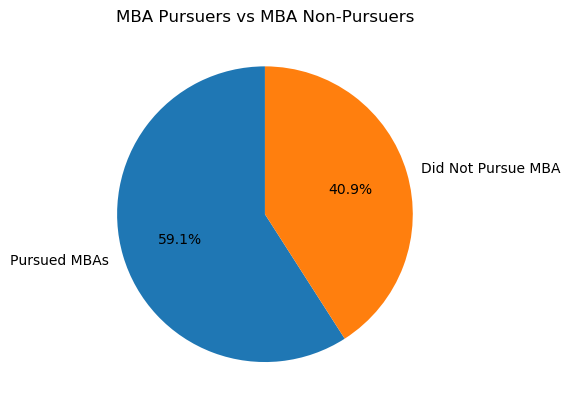

In [42]:
# Create pie chart of pursuers and non pursuers
labels = ["Pursued MBAs", "Did Not Pursue MBA"]
sizes = [mba_pursuer_count, mba_non_pursuer_count]

plt.pie(sizes, labels = labels, autopct = "%1.1f%%", startangle=90)
plt.title("MBA Pursuers vs MBA Non-Pursuers")
plt.show()

In [48]:
# Compare factors for pursuers and non-pursuers: Reason for MBA

# First using the pursuer dataframe


0        Entrepreneurship
4       Skill Enhancement
7        Entrepreneurship
8           Career Growth
9        Entrepreneurship
              ...        
9993    Skill Enhancement
9994           Networking
9995           Networking
9997           Networking
9998           Networking
Name: Reason for MBA, Length: 5907, dtype: object

In [72]:
# Store all the reasons for pursuing an MBA 
mba_reasons = [value for value in mba_pursuers["Reason for MBA"].unique()]
mba_reasons

['Entrepreneurship', 'Skill Enhancement', 'Career Growth', 'Networking']

In [68]:
# Determine values of Reason for MBAs and their value counts for pursuers

mba_pursuers["Reason for MBA"].value_counts()

Networking           1530
Skill Enhancement    1498
Career Growth        1444
Entrepreneurship     1435
Name: Reason for MBA, dtype: int64

In [119]:
entrep_total = mba_pursuers["Reason for MBA"].value_counts()[3]
skills_total = mba_pursuers["Reason for MBA"].value_counts()[1]
networking_total = mba_pursuers["Reason for MBA"].value_counts()[0]
growth_total = mba_pursuers["Reason for MBA"].value_counts()[2]

In [131]:
# Create a data frame for each job title that shows how much their decision was influenced by these reasons
#     Seperate data based on mba_reasons
entrep_pursued = mba_pursuers.loc[mba_pursuers["Reason for MBA"] == mba_reasons[0], :]
skill_enhancement_pursued = mba_pursuers.loc[mba_pursuers["Reason for MBA"] == mba_reasons[1], :]
career_growth_pursued = mba_pursuers.loc[mba_pursuers["Reason for MBA"] == mba_reasons[2], :]
networking_pursued = mba_pursuers.loc[mba_pursuers["Reason for MBA"] == mba_reasons[3], :]

# Group by Current Job Title and determine count of each reason for MBA 
# ("Reason for MBA" column must be added to get count of 1D series)
pursued_for_entrepreneurship = entrep_pursued.groupby("Current Job Title")["Reason for MBA"].count()
pursued_for_skills = skill_enhancement_pursued.groupby("Current Job Title")["Reason for MBA"].count()
pursued_for_growth = career_growth_pursued.groupby("Current Job Title")["Reason for MBA"].count()
pursued_for_networking = networking_pursued.groupby("Current Job Title")["Reason for MBA"].count()

# Calculate percentages
entrep_pursued_pct = pursued_for_entrepreneurship/entrep_total
skills_pursued_pct = pursued_for_skills/skills_total
growth_pursued_pct = pursued_for_growth/growth_total
networking_pursued_pct = pursued_for_networking/networking_total

# Create the Dataframe
pursued_reason_df = pd.DataFrame({
    "Entrepreneurship":  pursued_for_entrepreneurship,
    "Percent (1)": entrep_pursued_pct,
    "Skill Enhancement": pursued_for_skills,
    "Percent (2)": skills_pursued_pct,
    "Career Growth": pursued_for_growth,
    "Percent (3)": growth_pursued_pct,
    "Networking": pursued_for_networking,
    "Percent (4)": networking_pursued_pct,
})
# entrep_pursued
pursued_reason_df

,Entrepreneurship,Percent (1),Skill Enhancement,Percent (2),Career Growth,Percent (3),Networking,Percent (4)
Current Job Title,,,,,,,,
Analyst,289,0.201394,291,0.194259,275,0.190443,299,0.195425
Consultant,300,0.209059,294,0.196262,291,0.201524,306,0.200000
Engineer,256,0.178397,322,0.214953,299,0.207064,319,0.208497
Entrepreneur,289,0.201394,312,0.208278,293,0.202909,320,0.209150
Manager,301,0.209756,279,0.186248,286,0.198061,286,0.186928


In [135]:
analyst_reasons = pursued_reason_df.iloc[0]
analyst_reasons_entrep = pursued_reason_df.iloc[0]["Entrepreneurship"]
analyst_reasons_skills = pursued_reason_df.iloc[0]["Skill Enhancement"]
analyst_reasons_growth = pursued_reason_df.iloc[0]["Career Growth"]
analyst_reasons_networking = pursued_reason_df.iloc[0]["Networking"]

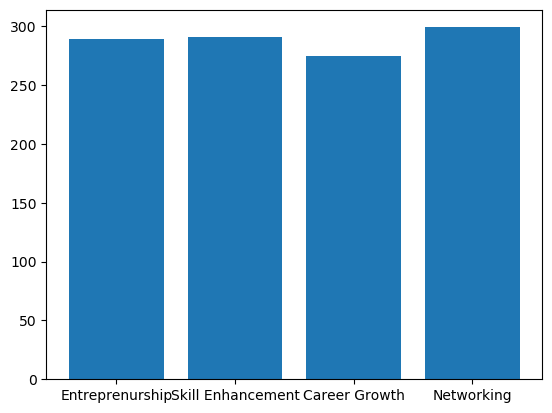

In [139]:
# Create a bar chart to outline the reasons for MBA pursuit - Analysts
labels = ["Entreprenurship", "Skill Enhancement", "Career Growth", "Networking"]
size = [analyst_reasons_entrep, analyst_reasons_skills, analyst_reasons_growth, analyst_reasons_networking]

plt.bar(labels, size)
plt.show()